In [13]:
import pandas as pd 
import numpy as np 
import seaborn as sns 

In [14]:
df = pd.read_csv('Wholesale_customers_data.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler , MinMaxScaler , RobustScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

In [17]:
df.iloc[:,2:].columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [18]:
transformer = ColumnTransformer(transformers=[("sclaer" , StandardScaler(),df.iloc[:,2:].columns)] 
                                , remainder="passthrough")

In [19]:
inertia = list()
k_range= range(2,30)
for i in k_range :
    steps = list()
    steps.append(('Transformer',StandardScaler()))
    steps.append(("model" , KMeans(n_clusters=i)))
    pipeline = Pipeline(steps=steps)
    pipeline.fit(df)
    inertia.append(pipeline["model"].inertia_)

<AxesSubplot:>

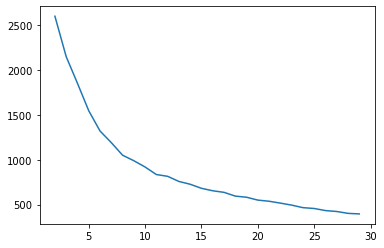

In [20]:
sns.lineplot(x=k_range , y=inertia)

In [21]:
from sklearn.metrics import silhouette_score

In [22]:
silhoute = list()
k_range = range(2,15)
for j in k_range:
    steps = list()
    steps.append(("transformer" , StandardScaler()))
    steps.append(("model" , KMeans(n_clusters=j)))
    pipline = Pipeline(steps=steps)
    pipeline.fit(df)
    silhoute.append(silhouette_score(df , pipeline['model'].labels_))

<AxesSubplot:>

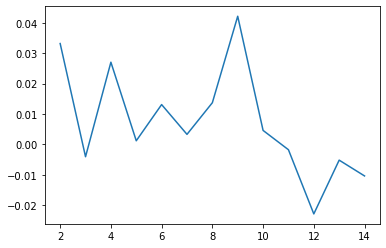

In [23]:
sns.lineplot(x= k_range , y=silhoute)

In [24]:
from kneed import KneeLocator

In [25]:
x = KneeLocator(k_range , inertia , curve="convex" , direction = "decreasing")

ValueError: x and y arrays must be equal in length along interpolation axis.

In [26]:
x.elbow

NameError: name 'x' is not defined